# Titanic Survival Data Set

In [ ]:
2020-07-08

## Imports

In [431]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [432]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

sns.set_style('darkgrid')

In [433]:
file = '../data/titanic/train.csv'
!ls {file}

../data/titanic/train.csv


### Helper function 

In [434]:
def statistics(df, transpose=True):
    ''' Function calls all the statistical attribute of the data set
    
    transpose : Boolean value, if set to False display information without transposing the rows and columns 
    => Data set shape
    => Description 
    => Information about it's data type
    => Histogram
    '''
    def display_df(df):
        ''' Changing the default display setting'''
        with pd.option_context('display.max_rows', 1000, 'display.max_columns', 1000):
            return display(df)
    print('=================')
    print(' Data set shape')
    print('=================')
    display_df(df.shape)      
    print('==================')
    if transpose :
        display_df(df.T)
        display_df(df.describe().T)
        display_df(df.info())
    else :
        display(df)
        display(df.describe())
        display(df.info())
   
    def plot_hist(df):
        '''Plots data set histgram distribution'''
        df.hist(figsize=(10,8))
        plt.show()
    plot_hist(df)  

## Reading and Analysis

In [435]:
df = pd.read_csv(file, sep=',')
df.columns = df.columns.str.lower()

 Data set shape


(891, 12)

0  \
passengerid                        1   
survived                           0   
pclass                             3   
name         Braund, Mr. Owen Harris   
sex                             male   
age                               22   
sibsp                              1   
parch                              0   
ticket                     A/5 21171   
fare                            7.25   
cabin                            NaN   
embarked                           S   

                                                             1  \
passengerid                                                  2   
survived                                                     1   
pclass                                                       1   
name         Cumings, Mrs. John Bradley (Florence Briggs Th...   
sex                                                     female   
age                                                         38   
sibsp                                                        1   
parch                                                        0   
ticket                                                PC 17599   
fare                                                   71.2833   
cabin                                                      C85   
embarked                                                     C   

                                  2  \
passengerid                       3   
survived                          1   
pclass                            3   
name         Heikkinen, Miss. Laina   
sex                          female   
age                              26   
sibsp                             0   
parch                             0   
ticket             STON/O2. 3101282   
fare                          7.925   
cabin                           NaN   
embarked                          S   

                                                        3  \
passengerid                                             4   
survived                                                1   
pclass                                                  1   
name         Futrelle, Mrs. Jacques Heath (Lily May Peel)   
sex                                                female   
age                                                    35   
sibsp                                                   1   
parch                                                   0   
ticket                                             113803   
fare                                                 53.1   
cabin                                                C123   
embarked                                                S   

                                    4                 5  \
passengerid                         5                 6   
survived                            0                 0   
pclass                              3                 3   
name         Allen, Mr. William Henry  Moran, Mr. James   
sex                              male              male   
age                                35               NaN   
sibsp                               0                 0   
parch                               0                 0   
ticket                         373450            330877   
fare                             8.05            8.4583   
cabin                             NaN               NaN   
embarked                            S                 Q   

                                   6                               7  \
passengerid                        7                               8   
survived                           0                               0   
pclass                             1                               3   
name         McCarthy, Mr. Timothy J  Palsson, Master. Gosta Leonard   
sex                             male                            male   
age                               54                               2   
sibsp                              0                               3   
parch    

,count,mean,std,min,25%,50%,75%,max
passengerid,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
sibsp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  891 non-null    int64  
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    int64  
 3   name         891 non-null    object 
 4   sex          891 non-null    object 
 5   age          714 non-null    float64
 6   sibsp        891 non-null    int64  
 7   parch        891 non-null    int64  
 8   ticket       891 non-null    object 
 9   fare         891 non-null    float64
 10  cabin        204 non-null    object 
 11  embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

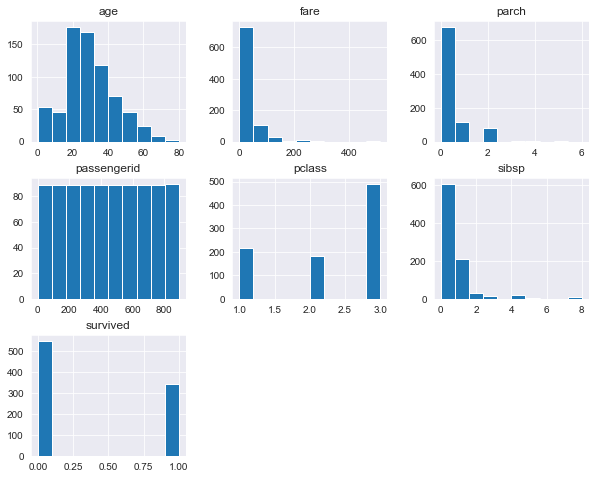

In [436]:
statistics(df) 

#### Fig 1 shows the relationship between the passenger's sex and if they survived

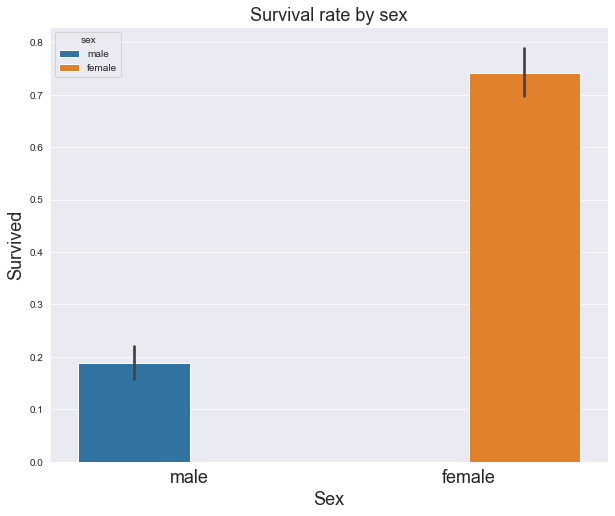

In [437]:
# rate of survival by sex
plt.figure(figsize=(10, 8))
sns.barplot('sex', 'survived', data=df, hue='sex')
plt.title('Survival rate by sex', fontsize=18)
plt.xticks(fontsize=18)
plt.ylabel('Survived', fontsize=18)
plt.xlabel('Sex', fontsize=18)
plt.show()

#### Adding a new column to the data set, this column would show the birth year of each passenger. This would check if the year a passenger was born relates to survival.

In [438]:
def birth_year(age):
    return 1912 - age
df['birth_year'] = df['age'].apply(lambda x : birth_year(x))

 Data set shape


(891, 13)

0  \
passengerid                        1   
survived                           0   
pclass                             3   
name         Braund, Mr. Owen Harris   
sex                             male   
age                               22   
sibsp                              1   
parch                              0   
ticket                     A/5 21171   
fare                            7.25   
cabin                            NaN   
embarked                           S   
birth_year                      1890   

                                                             1  \
passengerid                                                  2   
survived                                                     1   
pclass                                                       1   
name         Cumings, Mrs. John Bradley (Florence Briggs Th...   
sex                                                     female   
age                                                         38   
sibsp                                                        1   
parch                                                        0   
ticket                                                PC 17599   
fare                                                   71.2833   
cabin                                                      C85   
embarked                                                     C   
birth_year                                                1874   

                                  2  \
passengerid                       3   
survived                          1   
pclass                            3   
name         Heikkinen, Miss. Laina   
sex                          female   
age                              26   
sibsp                             0   
parch                             0   
ticket             STON/O2. 3101282   
fare                          7.925   
cabin                           NaN   
embarked                          S   
birth_year                     1886   

                                                        3  \
passengerid                                             4   
survived                                                1   
pclass                                                  1   
name         Futrelle, Mrs. Jacques Heath (Lily May Peel)   
sex                                                female   
age                                                    35   
sibsp                                                   1   
parch                                                   0   
ticket                                             113803   
fare                                                 53.1   
cabin                                                C123   
embarked                                                S   
birth_year                                           1877   

                                    4                 5  \
passengerid                         5                 6   
survived                            0                 0   
pclass                              3                 3   
name         Allen, Mr. William Henry  Moran, Mr. James   
sex                              male              male   
age                                35               NaN   
sibsp                               0                 0   
parch                               0                 0   
ticket                         373450            330877   
fare                             8.05            8.4583   
cabin                             NaN               NaN   
embarked                            S                 Q   
birth_year                       1877               NaN   

                                   6                               7  \
passengerid                        7                               8   
survived                           0                               0   
pclass                             1                               3   
name         McCarthy, Mr. Timot

,count,mean,std,min,25%,50%,75%,max
passengerid,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.500,891.0000
survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.000,1.0000
pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.000,3.0000
age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.000,80.0000
sibsp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.000,8.0000
parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.000,6.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.000,512.3292
birth_year,714.0,1882.300882,14.526497,1832.00,1874.0000,1884.0000,1891.875,1911.5800


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  891 non-null    int64  
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    int64  
 3   name         891 non-null    object 
 4   sex          891 non-null    object 
 5   age          714 non-null    float64
 6   sibsp        891 non-null    int64  
 7   parch        891 non-null    int64  
 8   ticket       891 non-null    object 
 9   fare         891 non-null    float64
 10  cabin        204 non-null    object 
 11  embarked     889 non-null    object 
 12  birth_year   714 non-null    float64
dtypes: float64(3), int64(5), object(5)
memory usage: 90.6+ KB


None

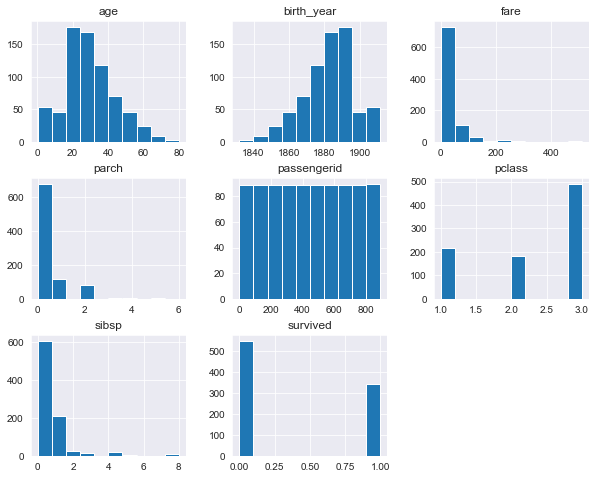

In [439]:
statistics(df)

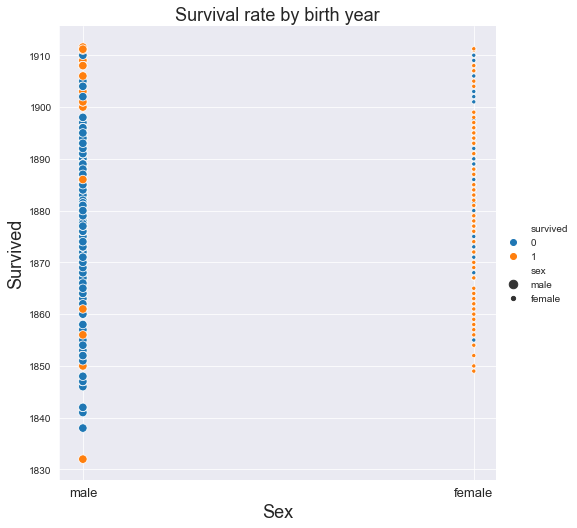

In [440]:
sns.relplot('sex', 'birth_year', data=df, hue='survived', height=7, size='sex')
plt.title('Survival rate by birth year', fontsize=18)
plt.xticks(fontsize=13)
plt.ylabel('Survived', fontsize=18)
plt.xlabel('Sex', fontsize=18)
plt.show()

For the male passengers, it turns out that apart from anyone below the age of 12 (1900 - 1912) the chances of death would be high.
While the birth year doesn't matter much for the female passengers.

#### Since more men dead, For the few that survived let's see what factors contributed to it.

In [441]:
df_men = df[df['sex'] == 'male'].copy()
df_men = df_men.drop('sex', axis=1) # dropping the sex column since it all male

 Data set shape


(577, 12)

,0,4,5,6,7,12,13,16,17,20,21,23,26,27,29,30,33,34,35,36,37,42,45,46,48,50,51,54,55,57,59,60,62,63,64,65,67,69,70,72,73,74,75,76,77,78,80,81,83,86,87,89,90,91,92,93,94,95,96,97,99,101,102,103,104,105,107,108,110,112,115,116,117,118,120,121,122,124,125,126,127,129,130,131,134,135,137,138,139,143,144,145,146,148,149,150,152,153,154,155,157,158,159,160,162,163,164,165,168,169,170,171,173,174,175,176,178,179,181,182,183,185,187,188,189,191,193,196,197,200,201,202,203,204,206,207,209,210,212,213,214,217,219,220,221,222,223,224,225,226,227,228,231,232,234,236,238,239,242,243,244,245,248,249,250,252,253,260,261,262,263,265,266,267,270,271,273,277,278,280,281,282,283,284,285,286,287,288,292,294,295,296,298,301,302,304,305,308,313,314,317,320,321,324,326,331,332,333,335,336,338,339,340,342,343,344,348,349,350,351,352,353,354,355,360,361,363,364,365,370,371,372,373,377,378,379,382,384,385,386,388,390,391,392,395,397,398,400,401,403,405,406,407,408,410,411,413,414,418,420,421,422,424,425,428,429,430,433,434,438,439,441,442,444,445,447,449,450,451,452,453,454,455,456,459,460,461,462,463,464,465,466,467,468,470,471,475,476,477,478,480,481,482,484,487,488,489,490,491,492,493,494,495,497,499,500,505,507,508,509,510,511,512,514,515,517,519,521,522,524,525,527,528,529,531,532,536,538,543,544,545,547,548,549,550,551,552,553,555,557,560,561,562,563,565,566,568,569,570,572,574,575,579,582,583,584,586,587,588,589,590,592,594,595,597,598,599,601,602,603,604,605,606,607,611,613,614,616,619,620,621,622,623,624,625,626,628,629,630,631,632,633,636,637,639,640,643,645,646,647,648,650,652,655,656,658,659,660,661,662,663,664,665,666,667,668,671,672,673,674,675,676,679,681,682,683,684,685,686,687,688,690,692,693,694,695,696,698,699,701,703,704,705,707,709,711,712,713,714,715,718,719,721,722,723,724,725,728,731,732,733,734,735,737,738,739,740,741,743,744,745,746,748,749,751,752,753,755,756,757,758,760,761,762,764,766,768,769,770,771,773,775,776,778,782,783,784,785,787,788,789,790,791,793,794,795,798,800,802,803,804,805,806,808,810,811,812,814,815,817,818,819,821,822,824,825,826,827,828,831,832,833,834,836,837,838,839,840,841,843,844,845,846,847,848,850,851,857,859,860,861,864,867,868,869,870,872,873,876,877,878,881,883,884,886,889,890
passengerid,1,5,6,7,8,13,14,17,18,21,22,24,27,28,30,31,34,35,36,37,38,43,46,47,49,51,52,55,56,58,60,61,63,64,65,66,68,70,71,73,74,75,76,77,78,79,81,82,84,87,88,90,91,92,93,94,95,96,97,98,100,102,103,104,105,106,108,109,111,113,116,117,118,119,121,122,123,125,126,127,128,130,131,132,135,136,138,139,140,144,145,146,147,149,150,151,153,154,155,156,158,159,160,161,163,164,165,166,169,170,171,172,174,175,176,177,179,180,182,183,184,186,188,189,190,192,194,197,198,201,202,203,204,205,207,208,210,211,213,214,215,218,220,221,222,223,224,225,226,227,228,229,232,233,235,237,239,240,243,244,245,246,249,250,251,253,254,261,262,263,264,266,267,268,271,272,274,278,279,281,282,283,284,285,286,287,288,289,293,295,296,297,299,302,303,305,306,309,314,315,318,321,322,325,327,332,333,334,336,337,339,340,341,343,344,345,349,350,351,352,353,354,355,356,361,362,364,365,366,371,372,373,374,378,379,380,383,385,386,387,389,391,392,393,396,398,399,401,402,404,406,407,408,409,411,412,414,415,419,421,422,423,425,426,429,430,431,434,435,439,440,442,443,445,446,448,450,451,452,453,454,455,456,457,460,461,462,463,464,465,466,467,468,469,471,472,476,477,478,479,481,482,483,485,488,489,490,491,492,493,494,495,496,498,500,501,506,508,509,510,511,512,513,515,516,518,520,522,523,525,526,528,529,530,532,533,537,539,544,545,546,548,549,550,551,552,553,554,556,558,561,562,563,564,566,567,569,570,571,573,575,576,580,583,584,585,587,588,589,590,591,593,595,596,598,599,600,602,603,604,605,606,607,608,612,614,615,617,620,621,622,623,624,625,626,627,629,630,631,632,633,634,637,638,640,641,644,646,647,648,649,651,653,656,657,659,660,661,662,663,664,665,666,667,668,669,672,673,674,675,676,677,680,682,683,684,685,686,687,688,689,691,693,694,695,696,697,699,700,702,704,705,70

,count,mean,std,min,25%,50%,75%,max
passengerid,577.0,454.147314,257.486139,1.00,222.0000,464.0,680.00,891.0000
survived,577.0,0.188908,0.391775,0.00,0.0000,0.0,0.00,1.0000
pclass,577.0,2.389948,0.813580,1.00,2.0000,3.0,3.00,3.0000
age,453.0,30.726645,14.678201,0.42,21.0000,29.0,39.00,80.0000
sibsp,577.0,0.429809,1.061811,0.00,0.0000,0.0,0.00,8.0000
parch,577.0,0.235702,0.612294,0.00,0.0000,0.0,0.00,5.0000
fare,577.0,25.523893,43.138263,0.00,7.8958,10.5,26.55,512.3292
birth_year,453.0,1881.273355,14.678201,1832.00,1873.0000,1883.0,1891.00,1911.5800


<class 'pandas.core.frame.DataFrame'>
Int64Index: 577 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  577 non-null    int64  
 1   survived     577 non-null    int64  
 2   pclass       577 non-null    int64  
 3   name         577 non-null    object 
 4   age          453 non-null    float64
 5   sibsp        577 non-null    int64  
 6   parch        577 non-null    int64  
 7   ticket       577 non-null    object 
 8   fare         577 non-null    float64
 9   cabin        107 non-null    object 
 10  embarked     577 non-null    object 
 11  birth_year   453 non-null    float64
dtypes: float64(3), int64(5), object(4)
memory usage: 78.6+ KB


None

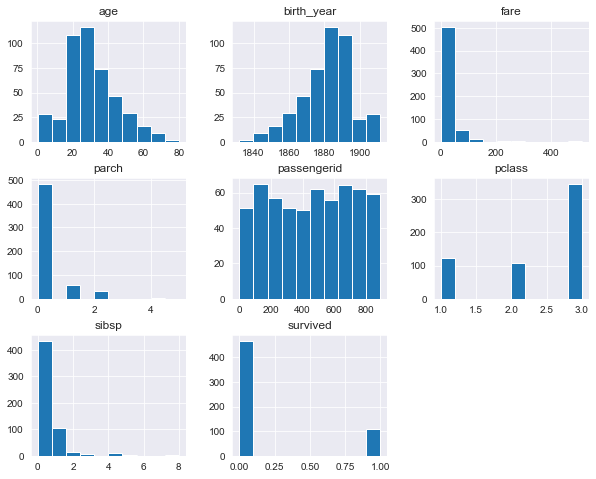

In [442]:
statistics(df_men)

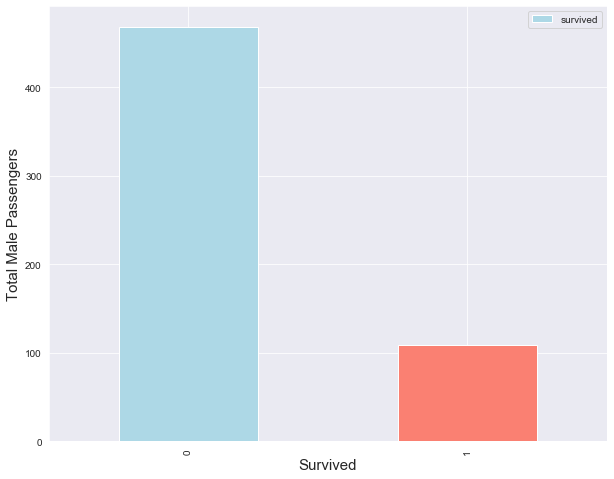

In [443]:
df_men['survived'].value_counts().plot.bar(figsize=(10, 8), 
                                           color=['lightblue', 'salmon'])
plt.ylabel('Total Male Passengers', fontsize=15)
plt.xlabel('Survived', fontsize=15)
plt.xticks(ticks=None,labels=None)
plt.legend()
plt.show()

In [444]:
# percentage of men who survived
round((len(df_men[df_men['survived'] == 1])/len(df_men[df_men['survived'] == 0])) * 100)

23

About 77% of the total male population died, while only a little above 100 which makes up only 23% where alive after the wreck.

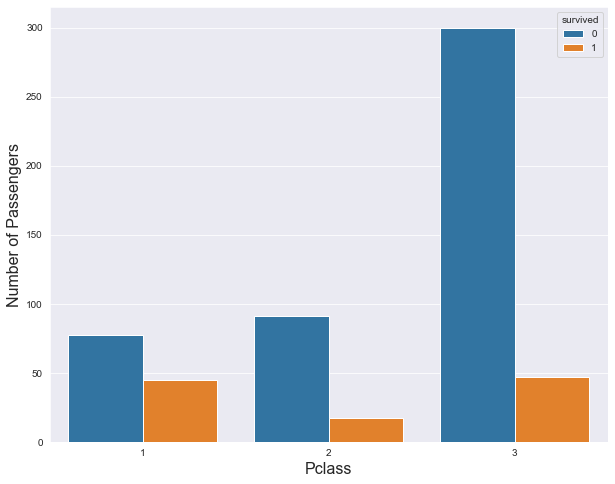

In [445]:
plt.figure(figsize=(10, 8))
sns.countplot('pclass', data=df_men, hue='survived')
plt.xlabel('Pclass', fontsize=16)
plt.ylabel('Number of Passengers', fontsize=16)
plt.show()

Male in the third class decks had the highest number of casualities and also the highest number of survivals amongst the three groups.
First class passengers seem to have little difference in the number of survivals and deaths.

In [446]:
odd = df_men[df_men['survived'] == 0] # male that didn't survive
by_decade = round(df_men['birth_year'] / 10) # turning birth year into decades

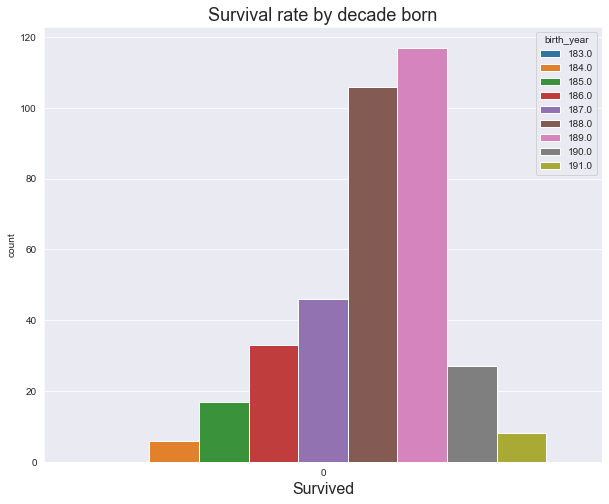

In [447]:
plt.figure(figsize=(10, 8))
sns.countplot(odd.survived, hue=by_decade, )
plt.title('Survival rate by decade born', fontsize=18)
plt.xlabel('Survived', fontsize=16)
plt.show()

Males born in the 1880's and 1890's were more likely to die 

In [448]:
odd_for = df_men[df_men['survived'] == 1] # male who did survive
by_decade = round(df_men['birth_year'] / 10) # turning birth year into decades

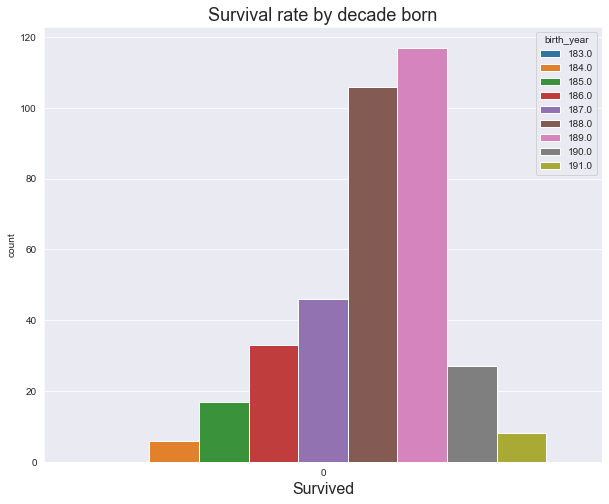

In [449]:
plt.figure(figsize=(10, 8))
sns.countplot(odd.survived, hue=by_decade, )
plt.title('Survival rate by decade born', fontsize=18)
plt.xlabel('Survived', fontsize=16)
plt.show()